Kuo Yang, Lab 3, 10/12/25  
CS 121/Python DSML  
East Los Angeles College, FA 2025

In [228]:
#import numpy as np
#import pandas as pd

## Load Data and Cleanup

In [229]:
glp1=pd.read_csv('glp1df.csv') #not sure why, but if I include encoding='latin1' I lose some data in api1 column
print(glp1.shape)

(300554, 25)


In [230]:
glp1.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Report Source,Concomitant Product Names,Latest Manufacturer Received Date,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1
0,25142581,Trulicity,Dulaglutide,Product Used For Unknown Indication,Injection Site Pain,Non-Serious,Non-Serious,Male,-,31-MAR-2025,...,Not Specified,-,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021448,-,-,1
1,25142580,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Visual Impairment;Product Storage Error,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,Not Specified,-,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021444,-,-,1
2,25141349,Trulicity,Dulaglutide,Product Used For Unknown Indication,Inappropriate Schedule Of Product Administrati...,Non-Serious,Non-Serious,Male,25-MAR-2025,31-MAR-2025,...,Not Specified,-,28-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503025775,-,-,1
3,25140677,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Depression;Decreased Appetite;Schizophrenia;Ma...,Serious,Hospitalized,Female,DEC-2024,31-MAR-2025,...,Not Specified,-,25-MAR-2025,31-MAR-2025,JP,Not Specified,JP-ELI_LILLY_AND_COMPANY-JP202503002636,-,-,1
4,25140673,Trulicity,Dulaglutide,Product Used For Unknown Indication,Paraesthesia,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,Not Specified,-,27-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024471,-,-,1


In [231]:
glp1.columns

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag', 'api1'],
      dtype='object')

### Clean up Age Column
* pull in only age in years
* change to numeric, force other errors to NA
* exclude NAs
* filter out only age from 1-150
* cleaned up dataset is "glp1a"

In [232]:
glp1['Patient Age']=glp1['Patient Age'].str.replace(' YR','')

In [233]:
glp1['Patient Age']=pd.to_numeric(glp1['Patient Age'],errors='coerce')

In [234]:
glp1b=glp1.dropna(subset=['Patient Age']) #valid age only
glp1a=glp1b[(glp1b['Patient Age'] >0) & (glp1b['Patient Age'] < 150)].copy() #realistic age values only (1-150)
glp1a['Patient Age']

,Patient Age
0,80.0
1,80.0
2,85.0
3,71.0
4,63.0
...,...
300549,55.0
300550,32.0
300551,49.0
300552,74.0


## Universal Functions & Aggregation
* mean, sd, 5-95% CI (parametric)
* median, 5th, 95th percentiles (nonparametric)

In [235]:
a_mean=np.mean(glp1a['Patient Age'])
a_sd=np.std(glp1a['Patient Age'])
lo=round(a_mean-1.96*a_sd,2)
hi=round(a_mean+1.96*a_sd, 2)
a_min=np.min(glp1a['Patient Age'])
a_max=np.max(glp1a['Patient Age'])
a_med=np.median(glp1a['Patient Age'])
a_q5=np.quantile(glp1a['Patient Age'],.05)
a_q95=np.quantile(glp1a['Patient Age'],.95)
a_q25=np.quantile(glp1a['Patient Age'],.25)
a_q75=np.quantile(glp1a['Patient Age'],.75)

In [236]:
print('All Cases')
print('Mean Age: ', a_mean, '|sd: ', a_sd, '| 5-95% CI: ', lo, '-',hi)
print('Min Age: ', a_min, '|Max Age: ', a_max)
print('Median Age: ', a_med, '|5th Percentile: ', a_q5, '|95th Percentile: ', a_q95)
print('25th Percentile: ', a_q25, '|75th Percentile: ', a_q75)

All Cases
Mean Age:  58.07764141046846 |sd:  12.872457612098598 | 5-95% CI:  32.85 - 83.31
Min Age:  2.0 |Max Age:  121.0
Median Age:  59.0 |5th Percentile:  35.0 |95th Percentile:  77.0
25th Percentile:  50.0 |75th Percentile:  67.0


For all cases, the mean is 58 compared to median of 59; the 5-95% CI is 33-83 compared to 5-95 percentile range of 35-77. It looks like age is pretty close to normally distributed and that there is not too much skewness without doing a formal statistical analysis.

Focusing on the Serious cases only:

In [237]:
glp1as=glp1a[glp1a['Serious']=='Serious'].copy()
glp1as.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Report Source,Concomitant Product Names,Latest Manufacturer Received Date,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1
3,25140677,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Depression;Decreased Appetite;Schizophrenia;Ma...,Serious,Hospitalized,Female,DEC-2024,31-MAR-2025,...,Not Specified,-,25-MAR-2025,31-MAR-2025,JP,Not Specified,JP-ELI_LILLY_AND_COMPANY-JP202503002636,-,-,1
7,25139513,Trulicity;Ozempic,Semaglutide;Dulaglutide,Blood Cholesterol Increased;Gastrooesophageal ...,Decreased Appetite;Impaired Gastric Emptying,Serious,Other Outcomes;Hospitalized,Female,01-DEC-2022,31-MAR-2025,...,Not Specified,Novolog;Pantoprazole;Omeprazole;Lantus;Atorvas...,25-MAR-2025,31-MAR-2025,US,Not Specified,US-NOVOPROD-1319160,-,-,1
17,25138176,Trulicity;Ozempic,Semaglutide;Dulaglutide,Product Used For Unknown Indication,Nausea;Impaired Gastric Emptying;Diarrhoea;Vom...,Serious,Other Outcomes,Not Specified,-,30-MAR-2025,...,Not Specified,-,27-MAR-2025,30-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024418,-,-,1
20,25140295,-,Dulaglutide,Diabetes Mellitus,Pancreatitis Acute,Serious,Required Intervention;Hospitalized,Male,16-OCT-2024,28-MAR-2025,...,Not Specified,-,-,28-MAR-2025,Not Specified,Not Specified,-,-,-,1
21,25137010,Trulicity,Dulaglutide,Product Used For Unknown Indication;Type 2 Dia...,Macular Degeneration,Serious,Other Outcomes,Male,-,28-MAR-2025,...,Not Specified,Victoza,19-MAR-2025,28-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503017503,-,-,1


In [238]:
a_mean=np.mean(glp1as['Patient Age'])
a_sd=np.std(glp1as['Patient Age'])
lo=round(a_mean-1.96*a_sd,2)
hi=round(a_mean+1.96*a_sd, 2)
a_min=np.min(glp1as['Patient Age'])
a_max=np.max(glp1as['Patient Age'])
a_med=np.median(glp1as['Patient Age'])
a_q5=np.quantile(glp1as['Patient Age'],.05)
a_q95=np.quantile(glp1as['Patient Age'],.95)
a_q25=np.quantile(glp1as['Patient Age'],.25)
a_q75=np.quantile(glp1as['Patient Age'],.75)

In [239]:
print('Serious Cases')
print('Mean Age: ', a_mean, '|sd: ', a_sd, '| 5-95% CI: ', lo, '-',hi)
print('Min Age: ', a_min, '|Max Age: ', a_max)
print('Median Age: ', a_med, '|5th Percentile: ', a_q5, '|95th Percentile: ', a_q95)
print('25th Percentile: ', a_q25, '|75th Percentile: ', a_q75)

Serious Cases
Mean Age:  58.47584778337747 |sd:  13.654534317198648 | 5-95% CI:  31.71 - 85.24
Min Age:  3.0 |Max Age:  104.0
Median Age:  60.0 |5th Percentile:  33.0 |95th Percentile:  79.0
25th Percentile:  50.0 |75th Percentile:  68.0


Two things:
1) similar to the analysis for all cases above, age appears to be close to normally distributed without much skewness. (again, this is just a cursory inspection without doing formal stats)
2) The mean/median of 58/60 is close to the age for all cases. It does not appear that serious cases are older or younger compared to all cases.

## Unique Value

In [240]:
#unique values of api1 column of dataset glp1as (serious events only)
api1=glp1as['api1']
api, counts=np.unique(api1,return_counts=True)
print('unique drugs: ',api, '| Counts: ', counts)
print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')

unique drugs:  [1 2 3 4 5] | Counts:  [ 7378 10079 10843 13605  4923]
1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)


In [241]:
#sorting
print('increasing order:', np.sort(counts))
print('increasing order:', api[np.argsort(counts)])

increasing order: [ 4923  7378 10079 10843 13605]
increasing order: [5 1 2 3 4]


There are a total of 5 unique GLP-1s, with semaglutide constituting the most number of reported serious cases at 13,605. This is striking given that it was approved relatively recently in 2017, compared to exenatide with 10,079 serious cases but was approved in 2005. Again, no rates can be calculated without total Rx dispensed/written. (This could also be partly explained by semaglutide's dual indications for diabetes and weight loss.)

In [242]:
sex1=glp1as['Sex']
sex2, scounts=np.unique(sex1,return_counts=True)
print('unique sex: ',sex2, '| Counts: ', scounts)

unique sex:  ['Female' 'Male' 'Not Specified'] | Counts:  [27073 18832   923]


Another way to do counts of different genders from last week

## Broadcasting

In [243]:
age=glp1as['Patient Age']

Age as a demographic variable is usually log-normally distributed. Let's see what happens if we do a ln transformation of age

In [244]:
agel=np.log(age)


In [245]:
a_mean=np.mean(agel)
a_sd=np.std(agel)
a_min=np.min(agel)
a_max=np.max(agel)

Descriptive stats of age, ln transformed

In [246]:
print('Serious Cases, ln(age)')
print('Mean Age: ', a_mean, '|sd: ', a_sd)

Serious Cases, ln(age)
Mean Age:  4.036191712748655 |sd:  0.2692246141426015


exponentiate back:

In [247]:
a_mean=np.exp(a_mean)

In [248]:
print('Serious Cases, ln(age), linear domain')
print('Mean Age: ', a_mean)

Serious Cases, ln(age), linear domain
Mean Age:  56.61034332371299


Assuming log-normal distribution, mean age is ~56.6, comparable to 58.5 without ln transformation. This does shift the measurement of central tendency a bit to the left, as expected. Just with a cursory look without doing a formal statistical analysis, a log-normal distribution may be just marginally better at describing age.

## Testing/scratch Area

In [249]:
grouped_agg=glp1as.groupby('api1')['Patient Age'].agg(['count','mean','std','min','max','median'])
print(grouped_agg)

      count       mean        std   min    max  median
api1                                                  
1      7378  62.205476  13.371170   4.0   99.0    63.0
2     10079  59.722492  11.240073   8.0  100.0    60.0
3     10843  57.888499  13.328205  12.0  104.0    59.0
4     13605  57.881588  14.541054   3.0  100.0    59.0
5      4923  53.269957  14.785739  10.0   95.0    54.0


Just for fun...

In [250]:
from scipy.stats import kstest
# Sample data
data = age

# Perform KS test against a normal distribution
k, p = kstest(data, 'norm', args=(58.48, 13.65))

print('k=', k, 'p=',p)


k= 0.05189228175483235 p= 4.929500668412601e-110


(array([   22.,   450.,  1874.,  4348.,  8643., 13395., 12229.,  4958.,
          855.,    54.]),
 array([  3. ,  13.1,  23.2,  33.3,  43.4,  53.5,  63.6,  73.7,  83.8,
         93.9, 104. ]),
 <BarContainer object of 10 artists>)

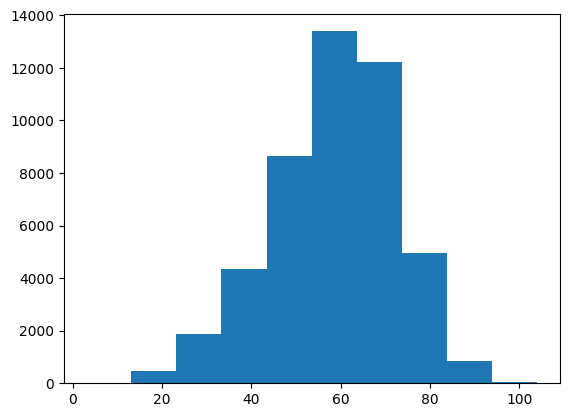

In [251]:
import matplotlib.pyplot as plt
plt.hist(data)

histogram looks normal, but p value from KS indicates significant deviation/non-normality. It even looks kind of left-skewed. I think age data needs to be cleaned better?